In [1]:
from sklearn.linear_model import LinearRegression  # linear regression
from sklearn.neighbors import KNeighborsRegressor  # k-nearest neighbors regression
from sklearn.tree import DecisionTreeRegressor     # decision tree regression
from sklearn.ensemble import RandomForestRegressor # random forest regression
from sklearn.svm import SVR  # support vector regression
import lightgbm as lgb # lightGBM
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split # split data
from sklearn.metrics import mean_squared_error # evaluation
import numpy as np

## split data

In [2]:
# load data processed by pca
train_data = np.load('./train_data_pca.npz')['X_train']
target_data = np.load('./train_data_pca.npz')['y_train']

# split data
X_train,X_valid,y_train,y_valid=train_test_split(train_data,target_data,test_size=0.2)

## linear regression

In [3]:
clf = LinearRegression()
clf.fit(X_train, y_train)
score = mean_squared_error(y_valid, clf.predict(X_valid))
print("LinearRegression:   ", score)

LinearRegression:    0.12065822332297042


In [4]:
for i in range(2,100,10):
    print(i)

2
12
22
32
42
52
62
72
82
92


In [5]:
from matplotlib import pyplot as plt


def plot_learning_curve(model, X_train, X_valid, y_train, y_valid):
    # learning curve
    train_score = []
    valid_score = []
    
    for i in range(10, len(X_train)+1, 10):
        model.fit(X_train[:i], y_train[:i])
        # 训练数据评估
        y_train_predict = model.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))
        
        # 验证数据评估
        y_valid_predict = model.predict(X_valid)
        valid_score.append(mean_squared_error(y_valid, y_valid_predict))
    
    # 可视化
    plt.plot([i for i in range(1, len(train_score)+1)],
            train_score, label="train")
    plt.plot([i for i in range(1, len(valid_score)+1)],
            valid_score, label="test")
    plt.legend()

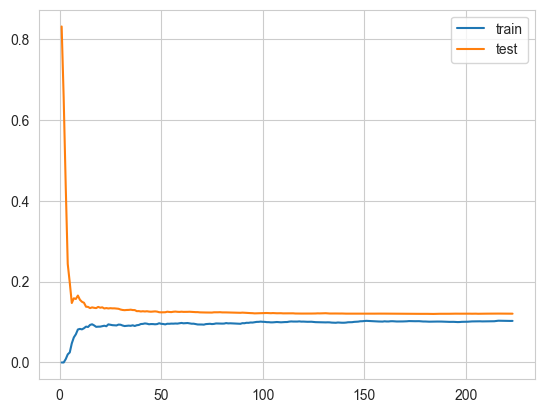

In [6]:
plot_learning_curve(LinearRegression(), X_train, X_valid, y_train, y_valid)
plt.show()

## k-nearest neighbors regression

In [7]:
for i in range(3,20):
    clf = KNeighborsRegressor(n_neighbors=i) # 3 neighbors
    clf.fit(X_train, y_train)
    score = mean_squared_error(y_valid, clf.predict(X_valid))
    print("KNeighborsRegressor:   ", score)

KNeighborsRegressor:    0.2704006087216248
KNeighborsRegressor:    0.261247456765233
KNeighborsRegressor:    0.26638858078853045
KNeighborsRegressor:    0.26474304176622865
KNeighborsRegressor:    0.2718176999487967
KNeighborsRegressor:    0.27076278357414874
KNeighborsRegressor:    0.2781862260055754
KNeighborsRegressor:    0.28447603383512543
KNeighborsRegressor:    0.2841864854853521
KNeighborsRegressor:    0.2850830137644365
KNeighborsRegressor:    0.2905700108269178
KNeighborsRegressor:    0.2895723293467925
KNeighborsRegressor:    0.2924955851612904
KNeighborsRegressor:    0.29338149081541215
KNeighborsRegressor:    0.2975590889050117
KNeighborsRegressor:    0.2961904947840612
KNeighborsRegressor:    0.30048252625621774


## Decision Tree Regression

In [8]:
clf = DecisionTreeRegressor() 
clf.fit(X_train, y_train)
score = mean_squared_error(y_valid, clf.predict(X_valid))
print("DecisionTreeRegressor:   ", score)

DecisionTreeRegressor:    0.3106416989247312


## Random Forest Regression

In [9]:
clf = RandomForestRegressor(n_estimators=20,
                            max_depth= 5,
                            min_samples_leaf=10,
                            min_samples_split=4,
                            criterion='squared_error')
clf.fit(X_train, y_train)
score = mean_squared_error(y_valid, clf.predict(X_valid))
print("RandomForestRegressor:   ", score)

RandomForestRegressor:    0.19476425370391784


## Support Vector Regression

In [10]:
clf1 = SVR(kernel='rbf',C = 1,gamma=0.01,tol = 0.0001,epsilon=0.3)
clf1.fit(X_train, y_train)
score = mean_squared_error(y_valid, clf1.predict(X_valid))
print("support vector regression:   ", score)
clf2 = SVR(kernel='poly')
clf2.fit(X_train, y_train)
score = mean_squared_error(y_valid, clf2.predict(X_valid))
print("support vector regression:   ", score)

support vector regression:    0.12229455895734181
support vector regression:    0.26774623081478754


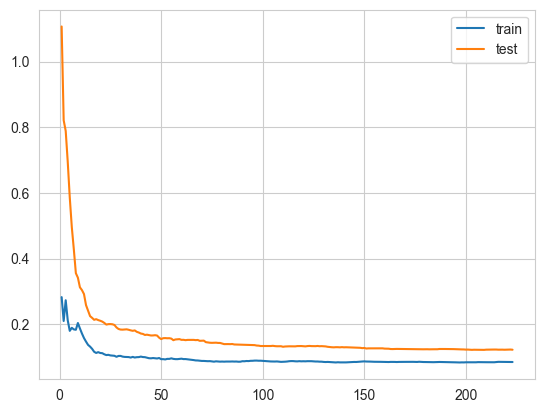

In [11]:
plot_learning_curve(clf1,X_train, X_valid, y_train, y_valid)

## lightGBM

In [12]:
clf = lgb.LGBMRegressor(learning_rate=0.05, 
                        n_estimators=300,
                        min_child_samples=10,
                        max_depth=5, 
                        num_leaves = 25,
                        colsample_bytree =0.8,
                        subsample=0.8,
                        reg_alpha = 0.5,
                        reg_lambda = 0.1 )
clf.fit(X_train, y_train)
score = mean_squared_error(y_valid, clf.predict(X_valid))
print("lightGBM:   ", score)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000545 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5610
[LightGBM] [Info] Number of data points in the train set: 2232, number of used features: 22
[LightGBM] [Info] Start training from score 0.156034
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

## Gradient Boosting

In [13]:
clf = GradientBoostingRegressor(learning_rate=0.03, # 学习率
                                loss='huber',  # 损失函数
                                max_depth=14, # 决策树深度
                                max_features='sqrt',# 节点分裂时参与判断的最大特征数
                                min_samples_leaf=10,# 是叶节点所需的最小样本数
                                min_samples_split=40,# 是分割所需的最小样本数
                                n_estimators=300,# 集成树数量
                                subsample=0.8)# 抽样比例
clf.fit(X_train, y_train)
score = mean_squared_error(y_valid, clf.predict(X_valid))
print("GradientBoostingRegressor:   ", score)

GradientBoostingRegressor:    0.1250901066662024
